In [220]:
import numpy as np
import pandas as pd

In [221]:
dataset = pd.read_csv("/home/andre/Desktop/projeto Renner/dataset.csv")

In [222]:
dataset['IBC-Br'] = [float(str(i).replace(",", ".")) for i in dataset['IBC-Br']]
dataset['icom'] = [float(str(i).replace(",", ".")) for i in dataset['icom']]

In [223]:
dataset.head()

,date,trend,ipca,selic,IBC-Br,icom,open,high,low,close,adjclose,volume,ticker
0,2011-01-01,Sideway,0.83,10.943548,132.66,106.1,9.264964,9.492898,7.756332,7.936712,6.187788,149128856,LREN3.SA
1,2011-02-01,Sideway,0.80,11.250000,136.18,111.4,8.033461,8.736943,7.756332,8.363064,6.520191,120569757,LREN3.SA
2,2011-03-01,Sideway,0.79,11.717742,144.93,105.3,8.364704,9.059987,8.140049,8.672990,6.761821,106565665,LREN3.SA
3,2011-04-01,Sideway,0.77,11.800000,139.89,108.5,8.672990,9.660159,8.625435,9.519135,7.440604,87893355,LREN3.SA
4,2011-05-01,Sideway,0.47,12.000000,143.23,106.4,9.512576,9.819222,8.896005,9.814302,7.843419,108838470,LREN3.SA


In [224]:
fechamento = dataset['close']

In [225]:
# Correlations

In [227]:
from scipy.stats import pearsonr

In [228]:
indices = ['IPCA', 'Selic','IBC-Br','ICOM']

for x in range(0, 4):   
    l=2+x
    corr, _ = pearsonr(dataset['close'], dataset.iloc[:,l])
    print(indices[x], 'Pearsons correlation: %.3f' % corr)

IPCA Pearsons correlation: -0.174
Selic Pearsons correlation: -0.704
IBC-Br Pearsons correlation: -0.430
ICOM Pearsons correlation: -0.090


(61.2, 111.4)

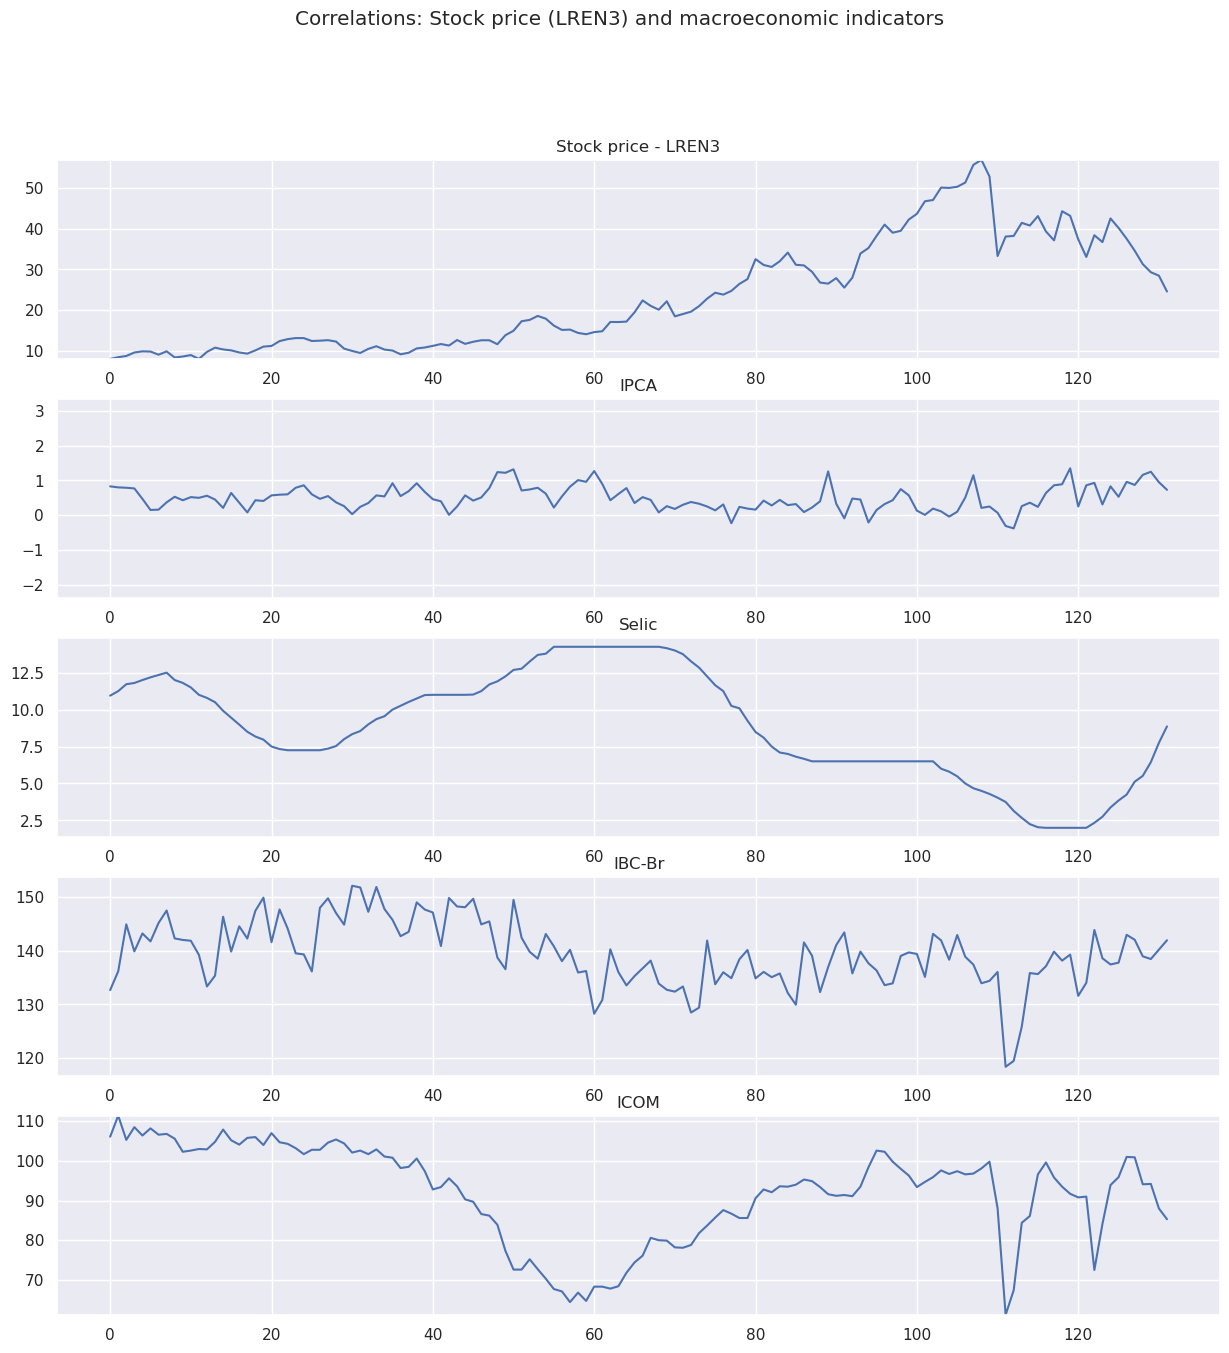

In [235]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib

fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey='row') # problem was sharey=True
fig.suptitle('Correlations: Stock price (LREN3) and macroeconomic indicators')

sns.lineplot(ax=axes[0], x=dataset.index, y=dataset['close'].values)
axes[0].set_title('Stock price - LREN3')  
axes[0].set_ylim(dataset['close'].min(), dataset['close'].max())

sns.lineplot(ax=axes[1], x=dataset.index, y=dataset['ipca'].values)
axes[1].set_title('IPCA')  
axes[1].set_ylim(dataset['ipca'].min()-2, dataset['ipca'].max()+2)

sns.lineplot(ax=axes[2], x=dataset.index, y=dataset['selic'].values)
axes[2].set_title('Selic')  

sns.lineplot(ax=axes[3], x=dataset.index, y=dataset['IBC-Br'].values)
axes[3].set_title('IBC-Br')

sns.lineplot(ax=axes[4], x=dataset.index, y=dataset['icom'].values)
axes[4].set_title('ICOM')  
axes[4].set_ylim(dataset['icom'].min(), dataset['icom'].max())
